In [100]:
#load sentiments_grouped.csv 

import pandas as pd
import numpy as np

df = pd.read_csv('balanced_sentimentdataset.csv')

#df = df.dropna()

df.head()

,Text,Sentiment
0,"Reflecting on a lifetime of memories, each wri...",Positive
1,Reflecting on the beauty of nature. ...,Positive
2,"Facing a defeat in the championship, the boxer...",Positive
3,Enthusiasm for learning new skills and expandi...,Positive
4,"Bathed in the glow of inspiration, a creative...",Positive


In [101]:
df.Sentiment.value_counts()

Sentiment
Positive    176
Negative    176
Neutral     100
Name: count, dtype: int64

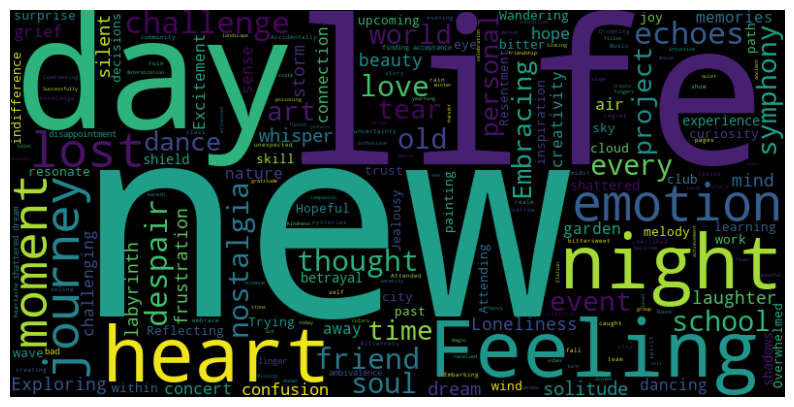

In [102]:
#Word Frequency and Text Analysis: Use natural language processing to identify common words, phrases, and topics, utilizing tools like word clouds or TF-IDF analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of words

text = df['Text'].values

# Join the list of words into a single string

text = ' '.join(text)

# Create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud

plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()



In [103]:
#unique values in the column 'sentiment'

len(df['Sentiment'].unique())

3

In [104]:
#Clean the text data by removing irrelevant information such as URLs, special characters, and emojis.

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting on a lifetime of memories each wrin...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting on the beauty of nature ...
2,"Facing a defeat in the championship, the boxer...",Positive,Facing a defeat in the championship the boxer ...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm for learning new skills and expandi...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed in the glow of inspiration a creative ...


In [105]:
pip install nltk

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [106]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring the necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and convert words to lower case
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Assuming 'df' is your DataFrame and it has a column 'cleaned_text' that contains text
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dabeer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dabeer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Sentiment,cleaned_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...


In [107]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/dabeer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
#Normalize the text by converting it to lowercase and lemmatizing or stemming words to reduce variation.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [109]:
df.head(10)


,Text,Sentiment,cleaned_text,lemmatized_text
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...,reflecting lifetime memory wrinkle tell story ...
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature,reflecting beauty nature
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...,facing defeat championship boxer reflects chal...
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...,enthusiasm learning new skill expanding knowledge
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...,bathed glow inspiration creative phoenix risin...
5,"Reflecting on life's journey, grateful for the...",Positive,Reflecting lifes journey grateful lessons learned,reflecting life journey grateful lesson learned
6,"Hopeful whispers of wind, carrying the promis...",Positive,Hopeful whispers wind carrying promises bright...,hopeful whisper wind carrying promise brighter...
7,Fulfillment in completing a challenging worko...,Positive,Fulfillment completing challenging workout rou...,fulfillment completing challenging workout rou...
8,Hosted a photography exhibition featuring snap...,Positive,Hosted photography exhibition featuring snapsh...,hosted photography exhibition featuring snapsh...
9,Trying out a new dessert recipe. ...,Positive,Trying new dessert recipe,trying new dessert recipe


In [110]:
#TF-IDF Analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the TF-IDF array

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

#retain only the top 10 words

df_tfidf = df_tfidf.sum().sort_values(ascending=False).head(20)

df_tfidf

new           6.424896
day           5.060570
feeling       4.878259
like          4.673833
echoes        4.404246
lost          4.298032
despair       4.194884
night         4.184825
heart         4.103125
lifes         3.944589
emotions      3.896630
journey       3.832410
challenges    3.764150
life          3.755001
shattered     3.731923
old           3.565716
love          3.563719
dreams        3.399141
thoughts      3.360243
personal      3.263015
dtype: float64

More Feature Engineering

In [111]:
#bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer object

vectorizer = CountVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the word count array

df_word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame

df_word_count.head()

,abstract,abyss,academic,acceptance,accidentally,accomplished,accomplishing,accomplishment,achieve,achievement,...,writer,writing,writinggroup,wrong,year,yearbook,yearning,years,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
#choose the top 10 words

df_word_count.sum().sort_values(ascending=False).head(20)

new           26
like          20
day           18
feeling       17
lost          15
journey       15
night         15
echoes        15
heart         15
despair       14
life          14
dreams        13
emotions      13
shattered     13
every         12
challenges    12
old           12
love          12
lifes         12
art           11
dtype: int64

In [113]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Applying n-grams function to the 'text' column
df['bigrams'] = df['Text'].apply(generate_ngrams)

# Output the DataFrame
print(df[['Text', 'bigrams']])

                                                  Text  \
0    Reflecting on a lifetime of memories, each wri...   
1     Reflecting on the beauty of nature.          ...   
2    Facing a defeat in the championship, the boxer...   
3    Enthusiasm for learning new skills and expandi...   
4     Bathed in the glow of inspiration, a creative...   
..                                                 ...   
447  Participating in a science fair to showcase a ...   
448  Attending a workshop on time management to enh...   
449  Volunteering at a local charity event to give ...   
450  Collaborating on a group project to promote te...   
451  Participating in a debate club to enhance crit...   

                                               bigrams  
0    [Reflecting on, on a, a lifetime, lifetime of,...  
1    [Reflecting on, on the, the beauty, beauty of,...  
2    [Facing a, a defeat, defeat in, in the, the ch...  
3    [Enthusiasm for, for learning, learning new, n...  
4    [Bathed in, i

In [114]:
df.head()

,Text,Sentiment,cleaned_text,lemmatized_text,bigrams
0,"Reflecting on a lifetime of memories, each wri...",Positive,Reflecting lifetime memories wrinkle tells sto...,reflecting lifetime memory wrinkle tell story ...,"[Reflecting on, on a, a lifetime, lifetime of,..."
1,Reflecting on the beauty of nature. ...,Positive,Reflecting beauty nature,reflecting beauty nature,"[Reflecting on, on the, the beauty, beauty of,..."
2,"Facing a defeat in the championship, the boxer...",Positive,Facing defeat championship boxer reflects chal...,facing defeat championship boxer reflects chal...,"[Facing a, a defeat, defeat in, in the, the ch..."
3,Enthusiasm for learning new skills and expandi...,Positive,Enthusiasm learning new skills expanding knowl...,enthusiasm learning new skill expanding knowledge,"[Enthusiasm for, for learning, learning new, n..."
4,"Bathed in the glow of inspiration, a creative...",Positive,Bathed glow inspiration creative phoenix risin...,bathed glow inspiration creative phoenix risin...,"[Bathed in, in the, the glow, glow of, of insp..."


In [115]:
pip install transformers


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


Implement pre trained model, use transfer learning, try multiclass logistic regression, and transfer learning on maybe a bert model, and fine tune it
-implement few models on the feature engineering features like "bigram", "lemmatized text", 'bag of words', and 'IMDF ANALYSIS'
-cross validate then

In [116]:
#bert tokenization
from transformers import BertTokenizer
tokenizer   = BertTokenizer.from_pretrained('bert-base-uncased')

In [117]:
x = df['Text'].values
y = df['Sentiment'].values
sequence = [sequence for sequence in x]

model_inputs = tokenizer(sequence, padding=True, truncation=True, max_length=512, return_tensors="tf") #or pt?


# Tokenize the text



In [118]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y))

In [119]:
dataset = dataset.cache()
dataset =dataset.shuffle(1000).batch(16)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [120]:
import tensorflow as tf

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = int(0.1 * total_size)

train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)


In [121]:
MAX_SEQUENCE_LENGTH = 512

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, Bidirectional

model = Sequential(name='sentiment_analysis')
model.add(Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=32))
model.add(Bidirectional(LSTM(32, activation='tanh', return_sequences=True)))
model.add(Dropout(0.5))  # Optional: add dropout for regularization
model.add(Flatten())  # Flatten the outputs for dense layers if return_sequences=True
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Optional: add another dropout layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Change to 5 output units with softmax

model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change loss function
              metrics=['accuracy'])


In [124]:
model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [125]:
pip install --upgrade tensorflow keras


DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [126]:
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the text data
x = df['Text'].values  # The column with text inputs

# Prepare the labels
y = df['Sentiment'].values  # The column with sentiment labels
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_integers)

# Tokenize the text data
model_inputs = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="tf")

# Create a TensorFlow Dataset object
dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y_onehot))

# Shuffle, batch, and prefetch the dataset
batch_size = 16
dataset = dataset.shuffle(len(x)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Calculate dataset sizes for split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = int(0.15 * total_size)

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define the model architecture
model = Sequential(name='sentiment_analysis')
model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_26                │ (None, 512, 64)        │        16,640 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_22         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,459 (3.95 MB)

 Trainable params: 1,035,459 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

the following model is weirdly too good

lets try k cross validation

In [127]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset, batch_size = 16, validation_data=val_dataset, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3722 - loss: 1.0955 - val_accuracy: 0.4375 - val_loss: 1.0945
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3943 - loss: 1.0925 - val_accuracy: 0.2969 - val_loss: 1.1041
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4199 - loss: 1.0890 - val_accuracy: 0.4844 - val_loss: 1.0889
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4709 - loss: 1.0827 - val_accuracy: 0.5000 - val_loss: 1.0910
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3822 - loss: 1.0837 - val_accuracy: 0.3594 - val_loss: 1.0914
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4487 - loss: 1.0852 - val_accuracy: 0.4688 - val_loss: 1.0881
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3942 - loss: 1.0804 - val_accuracy: 0.4375 - val_loss: 1.0801
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4100 - loss: 1.0693 - val_accuracy: 0.3125

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0166 


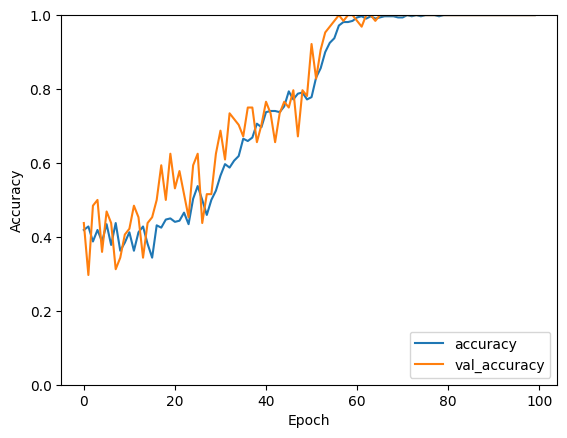

In [128]:
#TEST MODEL ON TEST DATASET

model.evaluate(test_dataset)

#PLOT EVALUATION METRICS ON TEST DATASET

import matplotlib.pyplot as plt

# Plot the training and validation accuracy

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0, 1])

plt.legend(loc='lower right')

plt.show()

In [129]:
from sklearn.model_selection import KFold
import numpy as np

# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs
y = df['Sentiment'].values  # The column with sentiment labels

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Initialize the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_indices, val_indices in kfold.split(x):
    # Tokenize the text data for the current fold
    train_inputs = tokenizer(list(x[train_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")
    val_inputs = tokenizer(list(x[val_indices]), padding=True, truncation=True, max_length=512, return_tensors="tf")

    # Convert to TensorFlow dataset for better performance
    train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs['input_ids'], y_onehot[train_indices]))
    val_dataset = tf.data.Dataset.from_tensor_slices((val_inputs['input_ids'], y_onehot[val_indices]))

    # Shuffle, batch, and prefetch the dataset
    batch_size = 16
    train_dataset = train_dataset.shuffle(len(train_indices)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

    # Define the model architecture for the current fold
    model = Sequential(name=f'sentiment_analysis_fold_{fold_no}')
    model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
    model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
    model.add(Bidirectional(LSTM(32, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

    # Compile the model for the current fold
    model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f'Training model for fold {fold_no}...')
    history = model.fit(train_dataset, epochs=100, validation_data=val_dataset)

    # Generate generalization metrics
    scores = model.evaluate(val_dataset)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training model for fold 1...
Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3360 - loss: 1.0983 - val_accuracy: 0.3478 - val_loss: 1.0974
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3598 - loss: 1.0957 - val_accuracy: 0.3478 - val_loss: 1.0964
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3874 - loss: 1.0932 - val_accuracy: 0.3478 - val_loss: 1.0953
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3849 - loss: 1.0896 - val_accuracy: 0.3478 - val_loss: 1.0943
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4224 - loss: 1.0859 - val_accuracy: 0.3478 - val_loss: 1.0934
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3720 - loss: 1.0884 - val_accuracy: 0.3478 - val_loss: 1.0922
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3769 - loss: 1.0798 - val_accuracy: 0.3478 - val_loss: 1.0911
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4111 - loss: 1.0

k fold now

In [130]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel

# Load the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample data loading
# Prepare the text data
x = df['Text'].values  # The column with text inputs

# Prepare the labels
y = df['Sentiment'].values  # The column with sentiment labels
# label_encoder = LabelEncoder()

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Tokenize the text data
tokenized_data = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="np")
input_ids = tokenized_data['input_ids']

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Variables for model evaluation
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for fold_no, (train, test) in enumerate(kfold.split(input_ids, y_onehot), 1):
    print(f'Training fold {fold_no}...')

    # Create model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(512,), dtype=tf.int32, name='input_ids'),
        tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit data to model
    history = model.fit(input_ids[train], y_onehot[train],
                        batch_size=16, epochs=50,
                        validation_data=(input_ids[test], y_onehot[test]))

    # Generate generalization metrics
    scores = model.evaluate(input_ids[test], y_onehot[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(num_folds):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training fold 1...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3886 - loss: 1.0873 - val_accuracy: 0.3297 - val_loss: 1.1016
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3398 - loss: 1.0660 - val_accuracy: 0.3297 - val_loss: 1.0985
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4380 - loss: 1.0526 - val_accuracy: 0.3516 - val_loss: 1.0917
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4654 - loss: 1.0090 - val_accuracy: 0.4945 - val_loss: 1.0333
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5997 - loss: 0.8396 - val_accuracy: 0.6484 - val_loss: 0.9255
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7830 - loss: 0.5104 - val_accuracy: 0.6044 - val_loss: 0.8899
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7778 - loss: 0.4617 - val_accuracy: 0.5275 - val_loss: 1.0339
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9344 - loss: 0.2636 - val_acc

In [131]:

#model add
#on lemmatized text

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from transformers import BertTokenizer, TFBertModel

# Load the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample data loading
# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs

# Prepare the labels
y = df['Sentiment'].values  # The column with sentiment labels
# label_encoder = LabelEncoder()

# Encoding labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Tokenize the text data
tokenized_data = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="np")
input_ids = tokenized_data['input_ids']

# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Variables for model evaluation
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
for fold_no, (train, test) in enumerate(kfold.split(input_ids, y_onehot), 1):
    print(f'Training fold {fold_no}...')

    # Create model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(512,), dtype=tf.int32, name='input_ids'),
        tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit data to model
    history = model.fit(input_ids[train], y_onehot[train],
                        batch_size=16, epochs=50,
                        validation_data=(input_ids[test], y_onehot[test]))

    # Generate generalization metrics
    scores = model.evaluate(input_ids[test], y_onehot[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(num_folds):
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


Training fold 1...
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4085 - loss: 1.0844 - val_accuracy: 0.3297 - val_loss: 1.0985
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4099 - loss: 1.0716 - val_accuracy: 0.3956 - val_loss: 1.0989
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4455 - loss: 1.0580 - val_accuracy: 0.3297 - val_loss: 1.0849
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4724 - loss: 0.9862 - val_accuracy: 0.5714 - val_loss: 0.9269
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7374 - loss: 0.5905 - val_accuracy: 0.6374 - val_loss: 0.8360
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8345 - loss: 0.2980 - val_accuracy: 0.6813 - val_loss: 1.0284
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9637 - loss: 0.2420 - val_accuracy: 0.6813 - val_loss: 0.8235
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.0879 - val_accuracy

In [132]:
pip install tf-keras

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/dlib-19.24.99-py3.12-macosx-10.9-universal2.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [133]:
from transformers import BertTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the tokenizer from the `bert-base-uncased` pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Prepare the text data
x = df['lemmatized_text'].values  # The column with text inputs

# Prepare the labels
y = df['Sentiment'].values  # The column with sentiment labels
label_encoder = LabelEncoder()
y_integers = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_integers)

# Tokenize the text data
model_inputs = tokenizer(list(x), padding=True, truncation=True, max_length=512, return_tensors="tf")

# Create a TensorFlow Dataset object
dataset = tf.data.Dataset.from_tensor_slices((model_inputs['input_ids'], y_onehot))

# Shuffle, batch, and prefetch the dataset
batch_size = 16
dataset = dataset.shuffle(len(x)).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Calculate dataset sizes for split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = int(0.15 * total_size)

# Split the dataset into train, validation, and test sets
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define the model architecture
model = Sequential(name='sentiment_analysis')
model.add(tf.keras.layers.Input(shape=(512,), dtype='int32'))  # Ensure the input layer matches BERT's output
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.vocab), output_dim=32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(tf.keras.layers.GlobalMaxPool1D())  # Use GlobalMaxPool1D instead of Flatten to handle variable-length sequences
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Change the output layer to match the number of classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)        │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_47                │ (None, 512, 64)        │        16,640 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_43         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,035,459 (3.95 MB)

 Trainable params: 1,035,459 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
with tf.device('/GPU:0'):
    history = model.fit(train_dataset, batch_size = 16, validation_data=val_dataset, epochs=200)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4025 - loss: 1.0982 - val_accuracy: 0.3438 - val_loss: 1.0982
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3414 - loss: 1.0982 - val_accuracy: 0.4219 - val_loss: 1.0949
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3893 - loss: 1.0950 - val_accuracy: 0.3438 - val_loss: 1.0979
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3665 - loss: 1.0918 - val_accuracy: 0.4219 - val_loss: 1.0901
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3887 - loss: 1.0888 - val_accuracy: 0.4531 - val_loss: 1.0924
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4382 - loss: 1.0858 - val_accuracy: 0.4688 - val_loss: 1.0895
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4415 - loss: 1.0827 - val_accuracy: 0.3438 - val_loss: 1.0855
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3903 - loss: 1.0892 - val_accuracy: 0.5312 -

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0052

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0045 


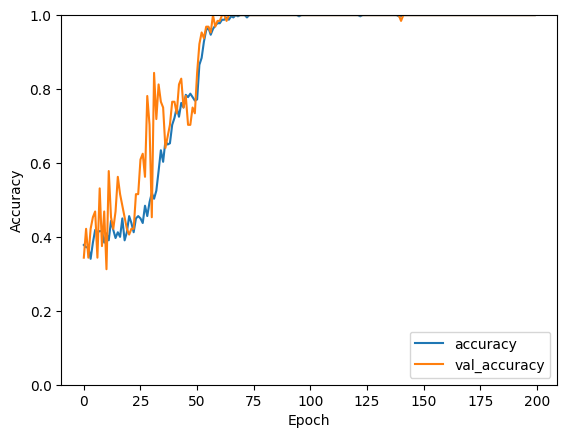

In [135]:
#TEST MODEL ON TEST DATASET

model.evaluate(test_dataset)

#PLOT EVALUATION METRICS ON TEST DATASET

import matplotlib.pyplot as plt

# Plot the training and validation accuracy

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0, 1])

plt.legend(loc='lower right')

plt.show()

fine tuning bert model, and adding own layer isnt working well

In [136]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Example DataFrame loading and preprocessing
# df = pd.read_csv('your_dataset.csv')  # Assuming DataFrame 'df' is already loaded
x = df['lemmatized_text'].values
y = df['Sentiment'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded, num_classes=len(set(y_encoded)))

# Tokenize text data
inputs = tokenizer(list(x), max_length=512, truncation=True, padding=True, return_tensors="tf")
input_ids = inputs['input_ids'].numpy()  # Convert to numpy array
attention_masks = inputs['attention_mask'].numpy()  # Convert to numpy array

# Create TensorFlow datasets
dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids, 'attention_mask': attention_masks}, y_onehot))

# Shuffling and batching the dataset
dataset = dataset.shuffle(buffer_size=10000).batch(16)

# Splitting the dataset
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # Ensure all data is used

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Print out the sizes to confirm
print(f"Total: {total_size}, Train: {train_size}, Val: {val_size}, Test: {test_size}")

# Now, you can proceed with model compilation and training.

# Compiling the model with the Adam optimizer and a suitable loss function

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

# Model training
model.fit(train_dataset, epochs=100, validation_data=val_dataset)

# Model evaluation
model.evaluate(val_dataset)


Total: 29, Train: 20, Val: 4, Test: 5
Epoch 1/100


KeyError: "Exception encountered when calling Sequential.call().\n\n\x1b[1minput_layer_23\x1b[0m\n\nArguments received by Sequential.call():\n  • inputs={'input_ids': 'tf.Tensor(shape=(None, 27), dtype=int32)', 'attention_mask': 'tf.Tensor(shape=(None, 27), dtype=int32)'}\n  • training=True\n  • mask={'input_ids': 'None', 'attention_mask': 'None'}"

In [ ]:
model.summary()

Model: "sentiment_analysis"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 512, 32)        │       976,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 512, 64)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 278)            │        71,446 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,318,404 (12.66 MB)

 Trainable params: 1,106,134 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,212,270 (8.44 MB)

In [137]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load tokenizer and model with the appropriate number of labels for classification
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Prepare the dataset
x = df['lemmatized_text'].values
y = df['Sentiment'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Tokenize and encode sentences to DistilBERT's format
inputs = tokenizer(x.tolist(), max_length=512, truncation=True, padding=True, return_tensors="tf")

# Prepare data for training
dataset = tf.data.Dataset.from_tensor_slices((inputs['input_ids'], y_onehot)).shuffle(1000).batch(16)

# Calculate sizes for 70-15-15 split
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = int(0.15 * len(dataset))

# Split the data
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

# Train the model
model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Evaluate the model


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/10
20/20 [==============================] - 26s 859ms/step - loss: 1.1116 - accuracy: 0.4000 - val_loss: 1.0616 - val_accuracy: 0.4062
Epoch 2/10
20/20 [==============================] - 11s 537ms/step - loss: 1.0967 - accuracy: 0.3500 - val_loss: 1.1125 - val_accuracy: 0.3438
Epoch 3/10
20/20 [==============================] - 11s 540ms/step - loss: 1.0537 - accuracy: 0.3906 - val_loss: 1.0761 - val_accuracy: 0.3750
Epoch 4/10
20/20 [==============================] - 11s 563ms/step - loss: 1.0696 - accuracy: 0.3594 - val_loss: 1.0852 - val_accuracy: 0.4375
Epoch 5/10
20/20 [==============================] - 11s 570ms/step - loss: 1.0889 - accuracy: 0.3469 - val_loss: 1.0393 - val_accuracy: 0.5000
Epoch 6/10
20/20 [==============================] - 11s 526ms/step - loss: 1.0729 - accuracy: 0.3938 - val_loss: 1.0272 - val_accuracy: 0.3594
Epoch 7/10
20/20 [==============================] - 12s 583ms/step - loss: 1.0744 - accuracy: 0.3844 - val_loss: 1.0574 - val_accuracy: 0.3750

5/5 [==============================] - 1s 100ms/step - loss: 1.1184 - accuracy: 0.2941


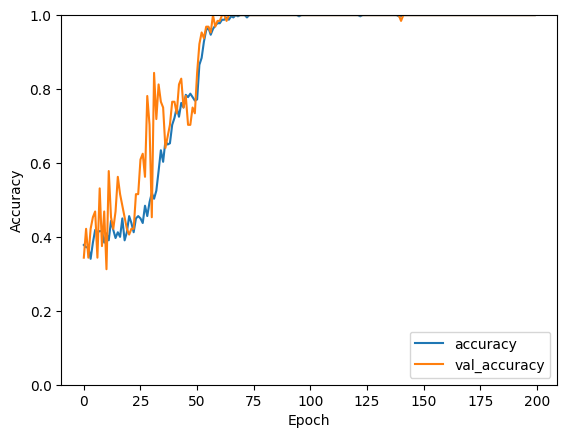

In [138]:
#TEST MODEL ON TEST DATASET

model.evaluate(test_dataset)

#PLOT EVALUATION METRICS ON TEST DATASET

import matplotlib.pyplot as plt

# Plot the training and validation accuracy

plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0, 1])

plt.legend(loc='lower right')

plt.show()